In [87]:
import numpy as np
from scipy.stats import binom, beta
from plotnine import *
from itertools import accumulate
import pandas as pd

In [209]:
n1, p1 = 10000, 0.62
n2, p2 = 10000, 0.65
seed_a = binom.rvs(1, p1, size=2000)
seed_b = binom.rvs(1, p2, size=10000)

np.random.shuffle(a)
np.random.shuffle(b)
a = [(sum(i==1), sum(i==0)) for i in np.array_split(seed_a, 100)]
b = [(sum(i==1), sum(i==0)) for i in np.array_split(seed_b, 100)]

In [190]:
def gennerate_avg(n=100000):
    def helper(row):
        res = np.sum(beta.rvs(row['a_x'] + 1, row['a_y'] + 1, size=n) > beta.rvs(row['b_x'] + 1, row['b_y'] + 1, size=n)) / n
        return res if res >= 1 - res else 1 - res
    return helper

In [210]:
a_x = [i[0] for i in accumulate(a, lambda x, y: (x[0] + y[0], x[1] + y[1]))]
a_y = [i[1] for i in accumulate(a, lambda x, y: (x[0] + y[0], x[1] + y[1]))]

b_x = [i[0] for i in accumulate(b, lambda x, y: (x[0] + y[0], x[1] + y[1]))]
b_y = [i[1] for i in accumulate(b, lambda x, y: (x[0] + y[0], x[1] + y[1]))]

df = pd.DataFrame({'a_x': a_x, 'a_y': a_y, 'b_x': b_x, 'b_y': b_y})

df['difference_percentage'] = df.apply(gennerate_avg(), axis=1)
df['a_p'] = df['a_x'] / (df['a_x'] + df['a_y'])
df['b_p'] = df['b_x'] / (df['b_x'] + df['b_y'])
df['id'] = df.index
df['group_a'] = 'a'
df['group_b'] = 'b'

df.head()

,a_x,a_y,b_x,b_y,difference_percentage,a_p,b_p,id,group_a,group_b
0,9,11,72,28,0.98922,0.45,0.7200,0,a,b
1,18,22,134,66,0.99539,0.45,0.6700,1,a,b
2,30,30,192,108,0.97828,0.50,0.6400,2,a,b
3,44,36,257,143,0.94201,0.55,0.6425,3,a,b
4,58,42,325,175,0.90974,0.58,0.6500,4,a,b


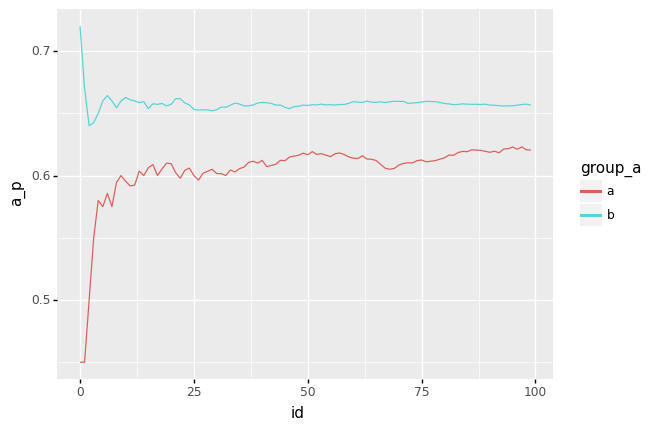

<ggplot: (-9223363253597459168)>

In [211]:
ggplot(df, aes()) + \
    geom_line(aes(x='id', y='a_p', color='group_a')) + \
    geom_line(aes(x='id', y='b_p', color='group_b'))

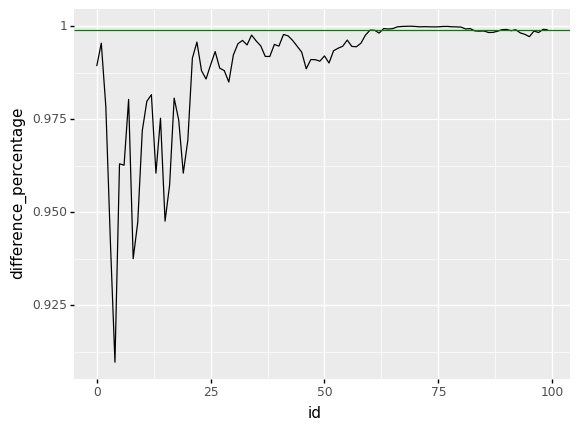

<ggplot: (8783265477149)>

In [212]:
ggplot(df, aes()) + \
    geom_line(aes(x='id', y='difference_percentage')) + \
    geom_hline(aes(yintercept=0.999), color='green')